# Handwritten Digit Classification

### Import tensorflow

In [48]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Import dataset

In [49]:
(X_train,Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

### Shape of imported arrays 

In [50]:
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)

X_train shape (60000, 28, 28)
Y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


### Plot an Image Example

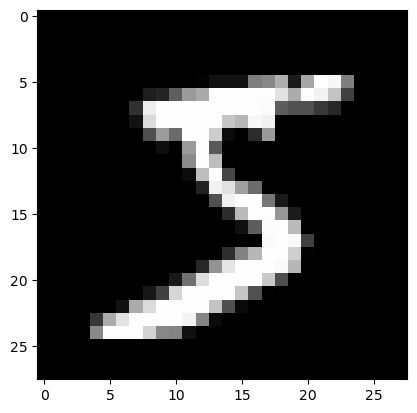

In [51]:
plt.imshow(X_train[0], cmap ='gray')

In [52]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Display Labels

In [53]:
Y_train[0]

5

### Normalizing the pixel values to the range [0, 1]

Normalizing the pixel values of images to a range between 0 and 1 is a common preprocessing step in machine learning, especially when working with neural networks. In the context of image data, pixel values are typically integers ranging from 0 to 255, where 0 represents black, 255 represents white, and values in between represent various shades of gray

In [54]:
X_train = X_train/255
X_test = X_test/255

Now check shape 

In [55]:
print("X_train new Shape ", X_train.shape)
print("X_test new Shape ", X_train.shape)

X_train new Shape  (60000, 28, 28)
X_test new Shape  (60000, 28, 28)


In [57]:
print("X_train ", X_train[0])
print()
print("X_test ", X_train[0])

X_train  [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.      

### Reshape in single array 

##### Reshape in X_train data set

In [58]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
X_train_flattened.shape

(60000, 784)

In [60]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

##### Reshape in X_train data set

In [61]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
X_test_flattened.shape

(10000, 784)

## Build the model 

In [63]:
model = keras.Sequential([
    
    keras.layers.Dense(120, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(120, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 120)               94200     
                                                                 
 dense_7 (Dense)             (None, 120)               14520     
                                                                 
 dense_8 (Dense)             (None, 10)                1210      
                                                                 
Total params: 109930 (429.41 KB)
Trainable params: 109930 (429.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the Model

In [65]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [66]:
model.fit(X_train_flattened, Y_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 1s 622us/step - loss: 0.2385 - accuracy: 0.9297
Epoch 2/20
1875/1875 [==============================] - 1s 622us/step - loss: 0.1003 - accuracy: 0.9692
Epoch 3/20
1875/1875 [==============================] - 1s 623us/step - loss: 0.0696 - accuracy: 0.9783
Epoch 4/20
1875/1875 [==============================] - 1s 608us/step - loss: 0.0538 - accuracy: 0.9825
Epoch 5/20
1875/1875 [==============================] - 1s 602us/step - loss: 0.0412 - accuracy: 0.9862
Epoch 6/20
1875/1875 [==============================] - 1s 617us/step - loss: 0.0334 - accuracy: 0.9892
Epoch 7/20
1875/1875 [==============================] - 1s 615us/step - loss: 0.0296 - accuracy: 0.9900
Epoch 8/20
1875/1875 [==============================] - 1s 612us/step - loss: 0.0261 - accuracy: 0.9919
Epoch 9/20
1875/1875 [==============================] - 1s 615us/step - loss: 0.0217 - accuracy: 0.9928
Epoch 10/20
1875/1875 [==============================] - 1s 615u

### Evaluate the performance of trained neural network model

In [67]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 392us/step - loss: 0.1222 - accuracy: 0.9799


[0.12224526703357697, 0.9799000024795532]

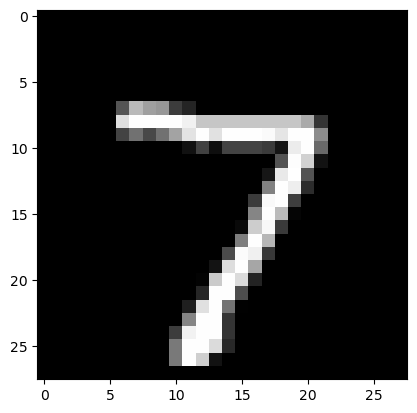

In [83]:
plt.imshow(X_test[0], cmap = 'gray')

In [84]:
Y_test[0]

7

In [70]:
Y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 379us/step


In [71]:
Y_predicted[0]

array([3.2267504e-09, 4.8302126e-01, 9.3286840e-04, 1.3712215e-01,
       2.0957364e-06, 4.1325379e-08, 5.3627424e-08, 9.9999994e-01,
       8.3953018e-06, 6.3914093e-03], dtype=float32)

###### Capture the maximum value of this above array and identify index

In [73]:
np.argmax(Y_predicted[0])

7

In [74]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[0]

7

In [78]:
Y_predicted_labels[2]

1

In [79]:
Y_test[2]

1

### Confusion Matrix

###### A confusion matrix is a table that is often used to evaluate the performance of a classification algorithm on a set of labeled data.

In [80]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    1,    0,    2,    0,    2,    1,    0,    0],
       [   0, 1132,    0,    0,    0,    0,    1,    0,    2,    0],
       [   5,    3, 1006,    2,    5,    0,    0,    6,    5,    0],
       [   1,    0,    4,  982,    0,    9,    0,    5,    6,    3],
       [   0,    1,    1,    1,  968,    0,    0,    3,    2,    6],
       [   3,    1,    0,   10,    1,  868,    6,    2,    0,    1],
       [   6,    3,    0,    1,   12,    3,  933,    0,    0,    0],
       [   0,    4,    5,    1,    0,    0,    0, 1009,    3,    6],
       [   4,    2,    2,    6,    7,    4,    3,    2,  940,    4],
       [   1,    3,    0,    4,    7,    4,    0,    4,    1,  985]],
      dtype=int32)>

In [81]:
cm.shape

TensorShape([10, 10])

### Visualize a Confusion Matrix 

This visualization can help to quickly identify patterns and understand how well in model is performing across different classes.

Text(95.72222222222221, 0.5, 'Truth')

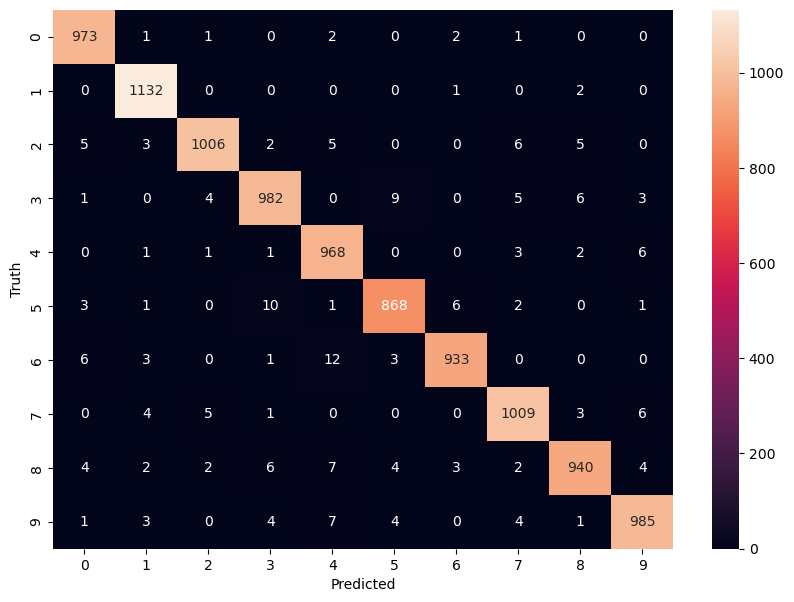

In [82]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')